In [1]:
using Random
using Images

In [238]:
images_path = "../../../Datasets/celeb_face_images/"
filenames = readdir(images_path)

images = Gray.(load(images_path*filenames[1]))
img_shape = size(images)
for filename in filenames[2:1000]
    image = Gray.(load(images_path * filename))
    images = cat(dims=3, images, image)
end

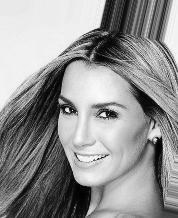

In [239]:
Gray.(images[:, :, 1])

In [240]:
println(size(images))
X = reshape(images, (img_shape[1]*img_shape[2], 1000))'
println(size(X))

(218, 178, 1000)
(1000, 38804)


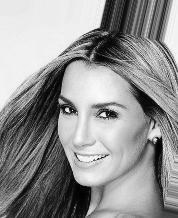

In [241]:
face = images[:, :, 1]

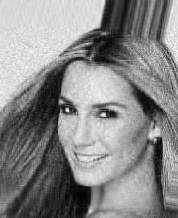

In [242]:
function NMF(V; k=10, iter_num=100)
    h, w = size(V)
    W, H = rand(h, k), rand(k, w)
    for i in 1:iter_num
        H .= H .* (W'*V) ./ (W' * (W*H))
        W .= W .* (V * H') ./ (W*H * H')
    end
    return W, H
end

W, H = NMF(face, k=50, iter_num=500)
V_ = W * H
Gray.(V_/max(V_...))

In [278]:
X = convert(Array{Float64}, X)
W, H = NMF(X, k=200, iter_num=1000)

([0.02666690412613726 4.0763486675299166e-13 … 2.7259926489960705e-44 0.2878113583705699; 0.7552183531227578 9.600835602986092e-11 … 2.051844283963386 1.5639560017632608; … ; 4.754095601061983e-144 3.0303493912400117e-18 … 1.5210472966242972e-9 2.6995064200285e-108; 0.18420834063880734 0.9757523588182581 … 0.17567863805204678 3.5159004794766295e-7], [0.0001495718384411033 3.857405734121677e-5 … 3.5408423697290025e-5 0.00019057347751210918; 2.22405175257047e-6 3.5881276884217564e-6 … 1.0628998439144312e-13 8.153902938265235e-15; … ; 3.2264079095989525e-5 7.61723864233378e-5 … 2.1546900860133803e-7 1.9109031175140482e-7; 5.42062901651042e-9 7.439724059723818e-9 … 2.2159248371182e-9 3.308930130109623e-8])

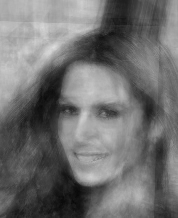

In [279]:
V_ = W * H
V_ = V_/max(V_...)
i = 1
Gray.(reshape(V_[i, :], (218, 178)))

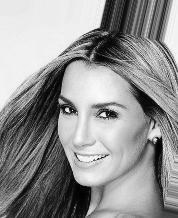

In [280]:
Gray.(images[:, :, i])

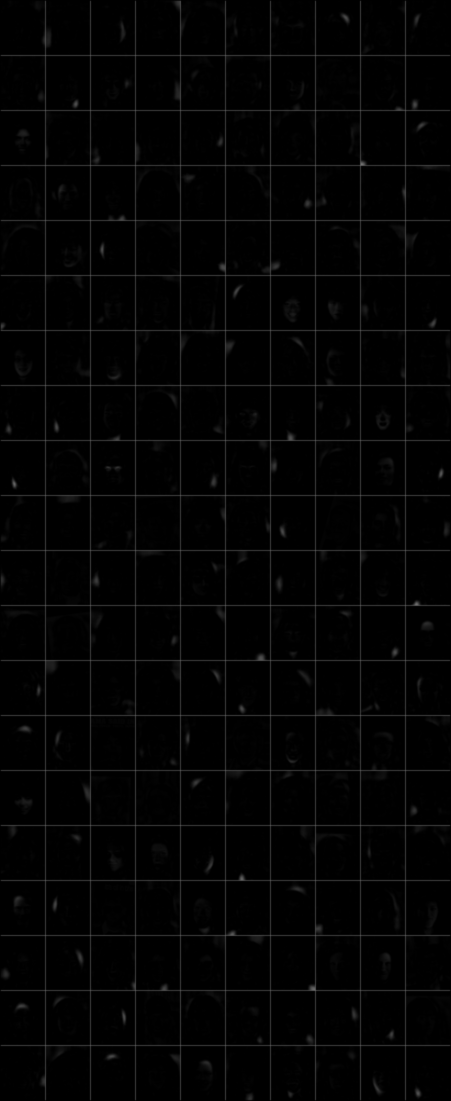

In [282]:
face_basis = Gray.(reshape(H', (218, 178, 200)))
mosaicview(face_basis; fillvalue=0.5, npad=2, ncol=10, rowmajor=true)